In [1]:
import urllib, json
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
areas_url = 'https://opendata.comune.ra.it/dataset/5ec2b0b3-24f7-4b75-987d-f53658d80064/resource/a8402fb2-3fd5-4a53-a691-263bb8e82640/download/sitra01aa01areeterritoriali.geojson'
areas_response = urllib.request.urlopen(areas_url)
areas_data = json.loads(areas_response.read())
#print(areas_data)
areas = gpd.GeoDataFrame.from_features(areas_data)
areas = areas[['geometry', 'NOME_AT']]
areas = areas.rename( columns = { 'NOME_AT' : 'frazione' } )
areas = areas.set_crs('epsg:4326')
areas = areas.to_crs( epsg = 32633 ) #utm
# print(areas.head(3))

In [3]:
points_url = 'https://opendata.comune.ra.it/dataset/35ffc0cc-0648-4411-bc4c-863096e899ad/resource/8363f296-8d09-4431-9dd6-5ffe81c9b7e2/download/servizi-ricreativi.geojson'
points_response = urllib.request.urlopen(points_url)
points_data = json.loads(points_response.read())
# print(points_data)
points = gpd.GeoDataFrame.from_features(points_data)
points = points[['NOME', 'TIPO', 'geometry']]
points = points[ points['TIPO'] == 'Palestra' ]
points = points.drop( columns = ['TIPO'] )
points = points.rename( columns = { 'NOME' : 'nome' } )
# print(points.crs)
points = points.set_crs('epsg:3004')
points = points.to_crs( epsg = 32633 ) #utm
# print(pints.head(3))

In [4]:
small_buff = points[:]
small_buff['geometry'] = small_buff.geometry.buffer(500)
small_buff['dissovefield'] = 1
small_buff = small_buff.dissolve( by = 'dissovefield' )
small_buff = small_buff.overlay(areas, how='intersection')

In [5]:
big_buff = points[:]
big_buff['geometry'] = big_buff.geometry.buffer(1250)
big_buff = big_buff.overlay(areas, how='intersection')

<AxesSubplot:>

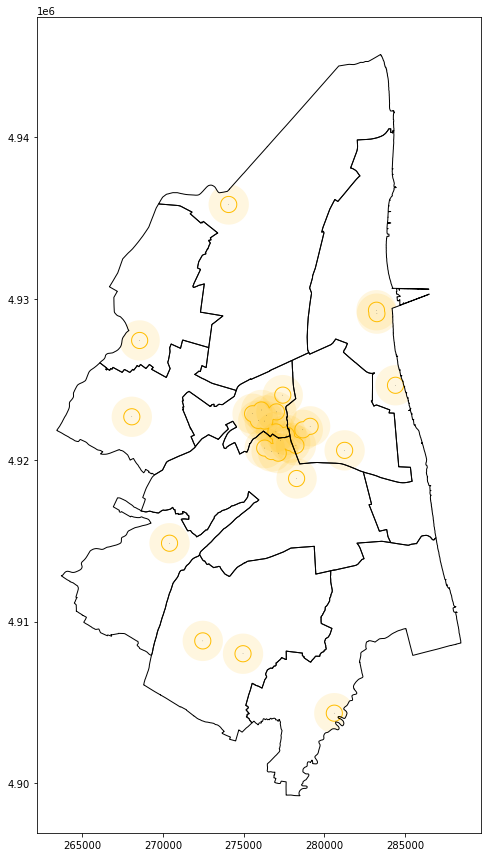

In [7]:
points['geometry'] = points.geometry.buffer(15) # with touple coordinates plots a big dot, turning it in a polygon prevents that
fig, ax = plt.subplots( figsize = (20, 15) )
big_buff.plot(ax = ax, color = '#FFBD0020')
small_buff.plot(ax = ax, color = 'none', linewidth = 1, edgecolor = '#FFBD00')
points.plot(ax = ax, color = 'black')
areas.plot(ax = ax, color = 'none', edgecolor = 'black')